# Scelta del dataset
E' stato scelto il dataset sui vini, il dataset è già presente all'interno della libreria `scikit-learn`:

In [1]:
from sklearn.datasets import load_wine
wine_data = load_wine( as_frame=True )
df = wine_data.data
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


# Correlazione
È stato chiesto di trovare le top 4 coppie di feature, usando tre distinti metodi di correlazione:
- Pearson
- Spearman
- Kendall

## Correlator
È stata progettata a tale scopo la classe `Correlator`, che si occupa di creare le combinazioni di coppie di features, e fornire il contesto per eseguire una funzione di correlazione tramite il metodo `run`, che prende come input una funzione `CorrelatorFn`, la quale implementa il metodo di correlazione.

In [2]:
from src.correlator import Correlator, pearson_fn, spearman_fn, kendall_fn
correlator = Correlator(df)

# I risultati, dizionari di (coppia di feature -> correlazione)
pearson_pairs = correlator.run(pearson_fn)
spearman_pairs = correlator.run(spearman_fn)
kendall_pairs = correlator.run(kendall_fn)

`Correlator` inoltre implementa il metodo `merge_correlation_results` che, come il nome intende, fonde in un unico dataset i risultati ottenuti:

In [3]:
merged_df = correlator.merge_correlation_results(
  Pearson = pearson_pairs,
  Spearman = spearman_pairs,
  Kendall = kendall_pairs
)
merged_df

,Pearson,Spearman,Kendall
Features,,,
"(alcohol, malic_acid)",0.094397,0.140430,0.093844
"(alcohol, ash)",0.211545,0.243722,0.170154
"(alcohol, alcalinity_of_ash)",-0.310235,-0.306598,-0.212978
"(alcohol, magnesium)",0.270798,0.365503,0.250506
"(alcohol, total_phenols)",0.289101,0.310920,0.209099
...,...,...,...
"(color_intensity, od280/od315_of_diluted_wines)",-0.428815,-0.317516,-0.206046
"(color_intensity, proline)",0.316100,0.457096,0.316632
"(hue, od280/od315_of_diluted_wines)",0.565468,0.485454,0.324678


## Risultati
Vengono selezionati i top 4 per ogni correlazione, di seguito fusi in un unico DataFrame e ordinati per media.

In [4]:
import pandas as pd
top_merged_df = (
  pd.concat([
    merged_df.sort_values('Pearson', ascending=False)[:4],
    merged_df.sort_values('Spearman', ascending=False)[:4],
    merged_df.sort_values('Kendall', ascending=False)[:4]
  ])
  .drop_duplicates()
  .assign( Mean = lambda df : df.mean(axis=1))
  .sort_values('Mean', ascending=False)
)
top_merged_df

,Pearson,Spearman,Kendall,Mean
Features,,,,
"(total_phenols, flavanoids)",0.864564,0.879404,0.701999,0.815322
"(flavanoids, od280/od315_of_diluted_wines)",0.787194,0.741533,0.520448,0.683058
"(flavanoids, proanthocyanins)",0.652692,0.730322,0.534615,0.639209
"(total_phenols, od280/od315_of_diluted_wines)",0.699949,0.687207,0.478267,0.621808


Si nota che, per ogni metodo di correlazione, sono stati scelti le prime 4 coppie di feature con valore più alto, successivamente sono stati fusi i risultati, il dataframe risultato ha comunque quattro coppie di features, almeno in questo caso.  

Di seguito, i grafici delle coppie di features:

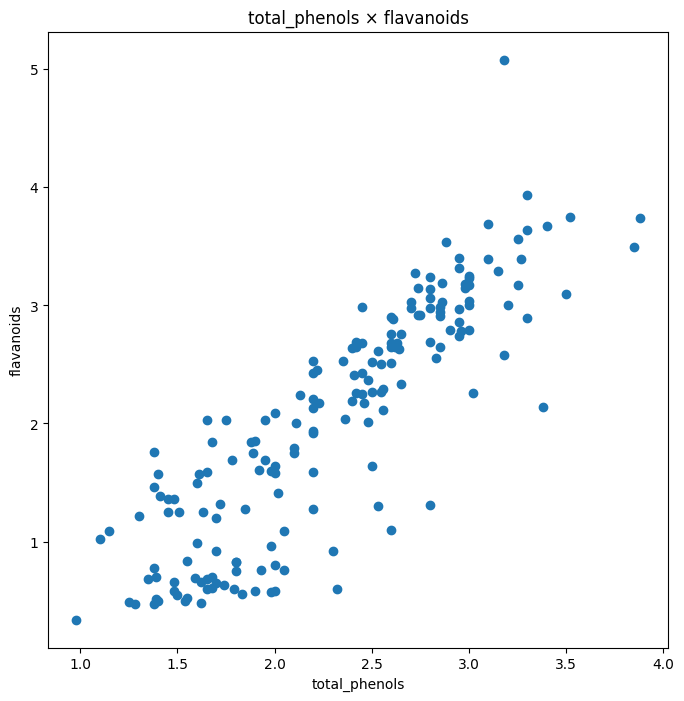

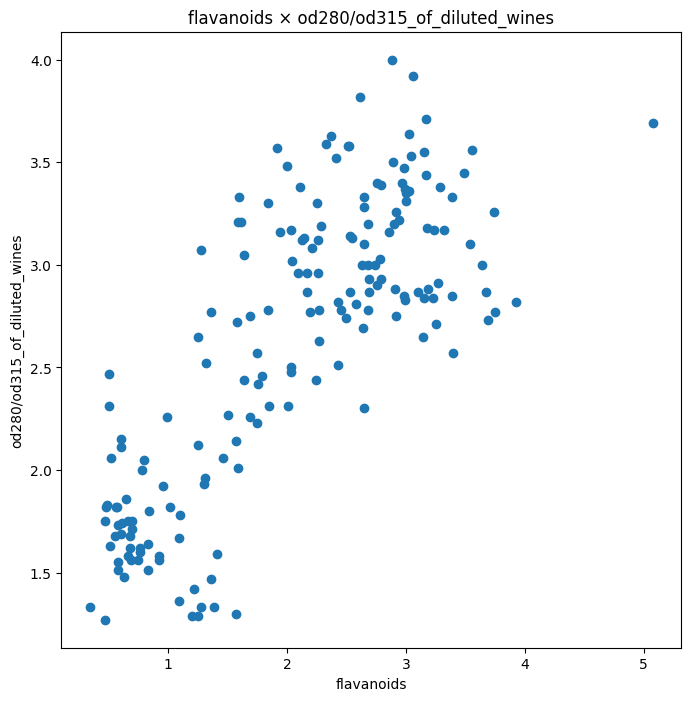

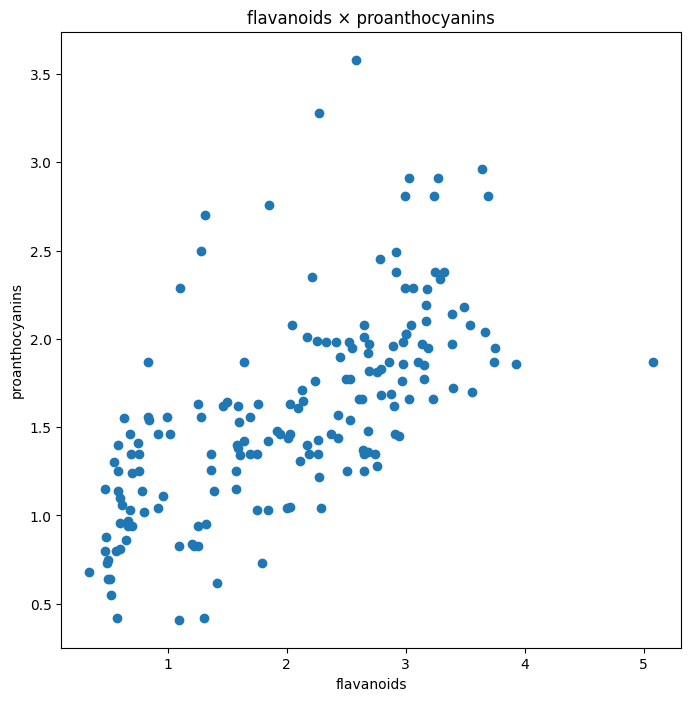

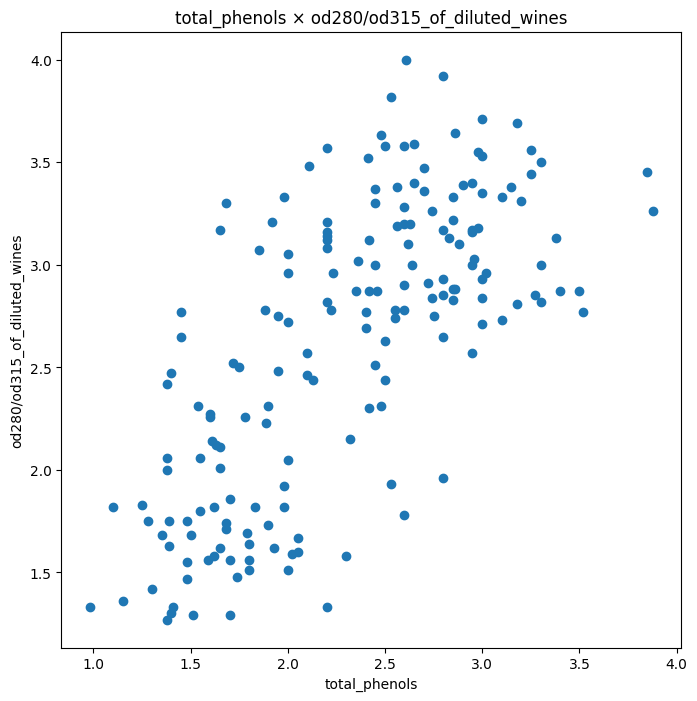

In [5]:
from src.utils import plot_feature_pairs_from_merged_set
plot_feature_pairs_from_merged_set(df, top_merged_df)

# Principal Component Analysis e Single Value Decomposition
È richiesto di elaborare PCA e SVD sul dataset.
### Elaborazione della PCA
La Principal Component Analysis (PCA) è una tecnica di riduzione della dimensione

In [6]:
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
pca_fit_data = pca.fit_transform(df.values)
pca_df = pd.DataFrame(pca_fit_data, columns=[ "principal component {0}".format(n) for n in range(n_components) ])

pca_df

,principal component 0,principal component 1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995
...,...,...
173,-6.980211,-4.541137
174,3.131605,2.335191
175,88.458074,18.776285
176,93.456242,18.670819


### Elaborazione della SVD
E' una tecnica che consiste nel ridurre il dataset iniziale in un prodotto tra matrici

In [7]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=n_components)
svd_fit_data = svd.fit_transform(df.values)
svd_df = pd.DataFrame( svd_fit_data, columns=[ "component {0}".format(n) for n in range(n_components) ])

svd_df

,component 0,component 1
0,1072.758361,0.967325
1,1054.621609,-24.310812
2,1188.953065,-37.591312
3,1483.244108,-61.293558
4,744.147210,32.575308
...,...,...
173,746.463207,10.014892
174,757.244278,16.010371
175,843.673409,22.567614
176,848.627607,21.891097


### Salvataggio su disco
Di seguito, il codice che salva su disco

In [8]:
pca_df.to_csv('out/pca.csv')
svd_df.to_csv('out/svd.csv')